In [157]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

import math
import scipy
import pickle
import sklearn.neighbors

from sklearn import (cluster, preprocessing, datasets, metrics)
from scipy import (sparse, spatial)
from itertools import (cycle, islice)

from sklearn.cluster import (KMeans, SpectralClustering)
from sklearn.datasets import (make_blobs, make_circles, make_moons)

In [158]:
# Set seed for reproducable results
np.random.seed(1)

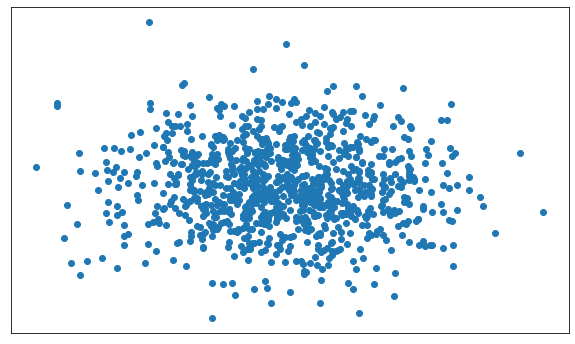

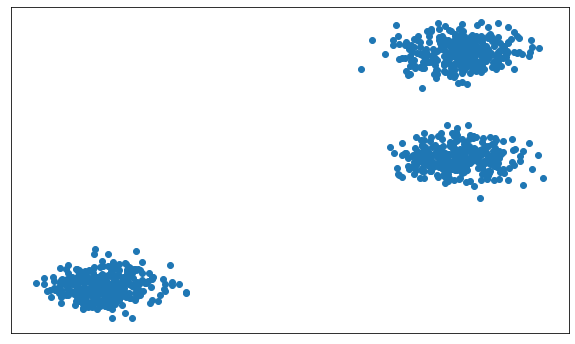

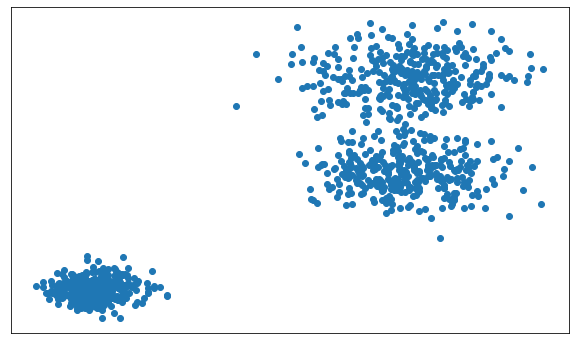

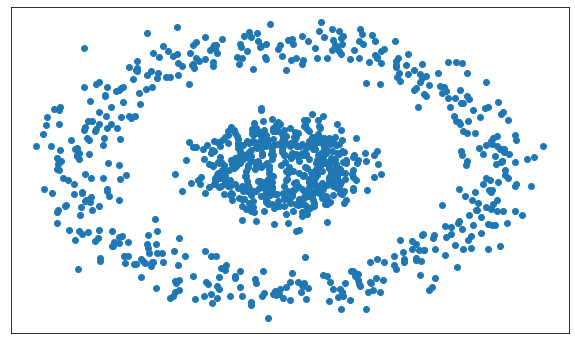

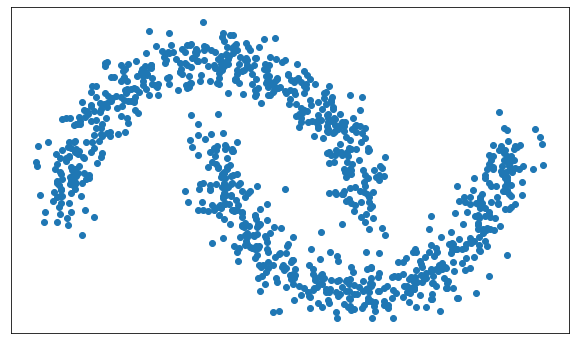

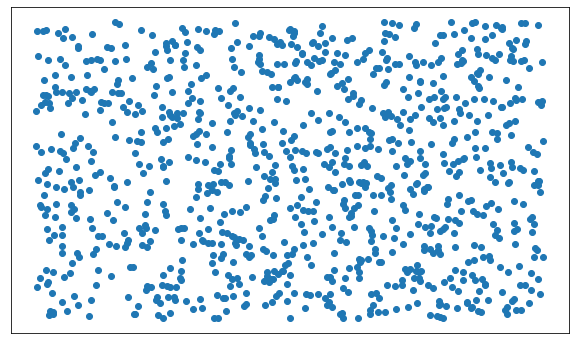

In [159]:
samples = 1000
state = 8
blobs = 3
factor = 0.25
noise = 0.1

the_datasets = {
    "single_blob": make_blobs(
        n_samples=samples, 
        centers=1
    ),
    "multiple_blobs": make_blobs(
        n_samples=samples, 
        centers=blobs,  
        random_state=state,
    ),
    "multiple_blobs_std": make_blobs(
        n_samples=samples, 
        centers=blobs, 
        cluster_std=np.random.uniform(low=0.5, high=2, size=blobs), 
        random_state=state,
    ),
    "rings": make_circles(
        n_samples=samples,
        factor=factor,
        noise=noise,
    ),
    "moons": make_moons(
        n_samples=samples,
        noise=noise,
    ),
    "random": (np.random.rand(samples, 2), None),
}


for i, (dataset_name, dataset) in enumerate(the_datasets.items()):
    X, y = dataset
    X = preprocessing.MinMaxScaler().fit_transform(X)

    fig, ax = plt.subplots()

    fig.set_figwidth(10)
    fig.set_figheight(6)

    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.scatter(X[:, 0], X[:, 1], rasterized=True)
   
    fig.show()

# Comparing k-means and DBSCAN

In [160]:
dataset = datasets.make_circles(n_samples=1000, factor=.5, noise=.05)

X, y = dataset

## k-means

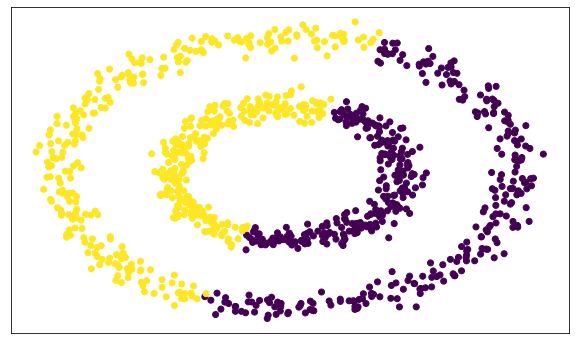

In [161]:
kmeans = cluster.KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.figure(figsize=(10, 6))
plt.xticks([])
plt.yticks([])
plt.scatter(X[:, 0], X[:, 1], c=y_pred, rasterized=True)
plt.show() 

## DBSCAN

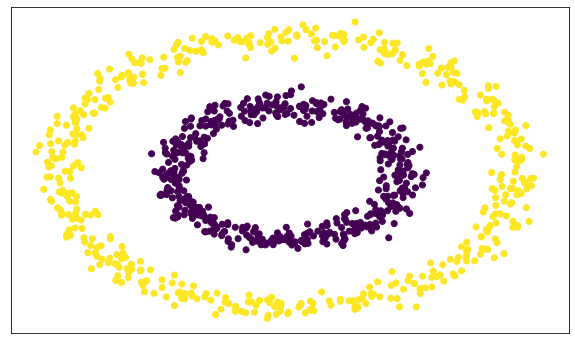

In [162]:
dbscan = cluster.DBSCAN(eps=.15)
dbscan.fit(X)
y_pred = dbscan.labels_.astype(np.int)

plt.figure(figsize=(10, 6))
plt.xticks([])
plt.yticks([])
plt.scatter(X[:, 0], X[:, 1], c=y_pred, rasterized=True)
plt.show() 

# Kmeans iterations

In [163]:
dataset = datasets.make_blobs(n_samples=1000, cluster_std=[1, 3, 3], random_state=8)

initial_centroids = np.array([[0, 0], [2,  -2], [2, 2]])

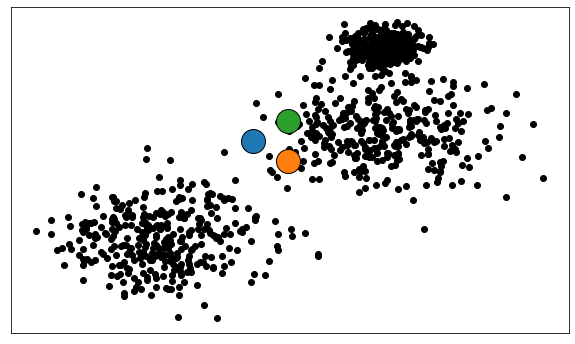

In [167]:
X, y = dataset

plt.figure(figsize=(10, 6))
plt.xticks([])
plt.yticks([])
plt.scatter(X[:, 0], X[:, 1], color='#000000', rasterized=True)

for idx, center in enumerate(initial_centroids):
    plt.plot(
        [center[0]], 
        [center[1]], 
        marker='o', 
        markersize=24, 
        markeredgecolor='black'
    )

plt.show() 

iteration: 1


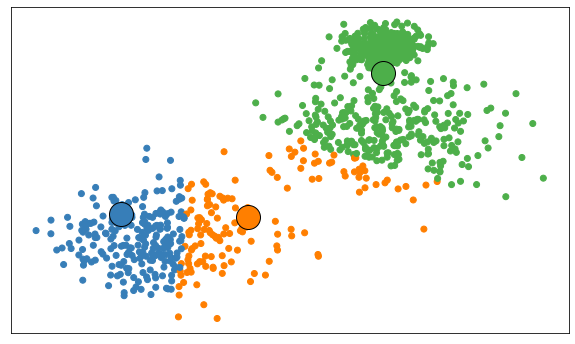

iteration: 2


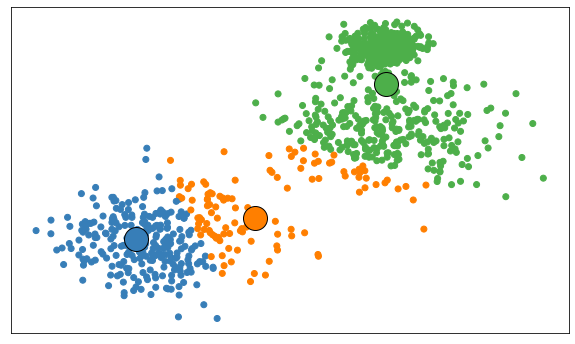

iteration: 3


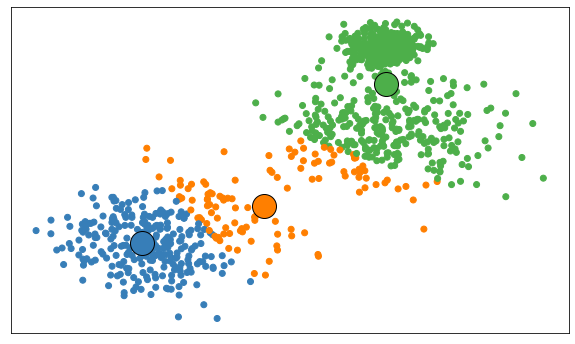

iteration: 4


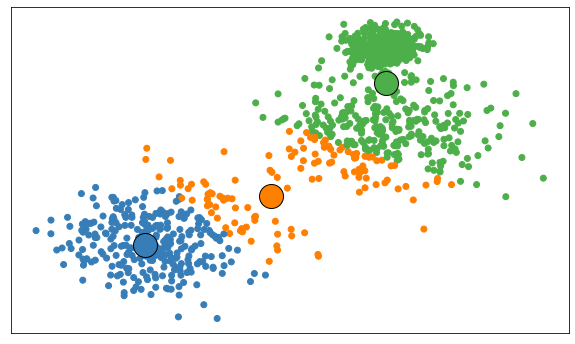

iteration: 5


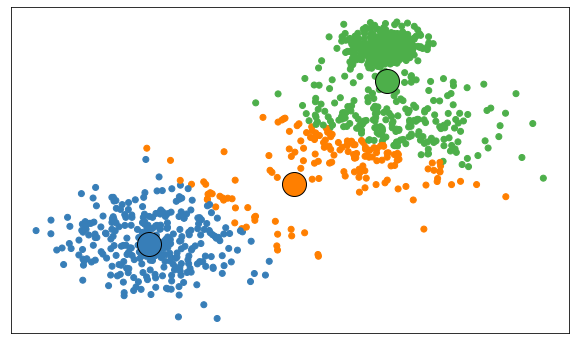

iteration: 6


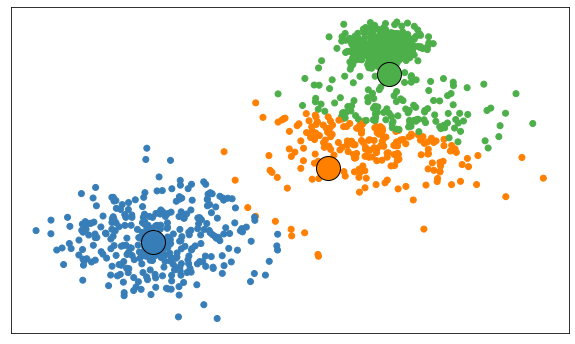

iteration: 7


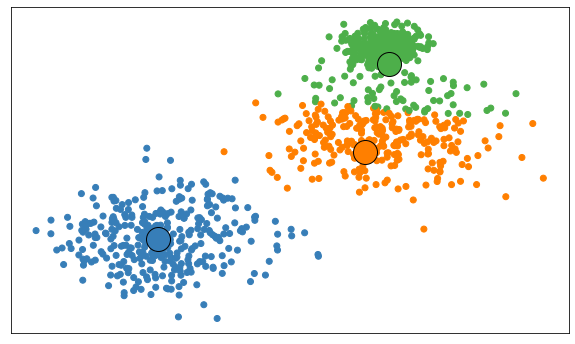

iteration: 8


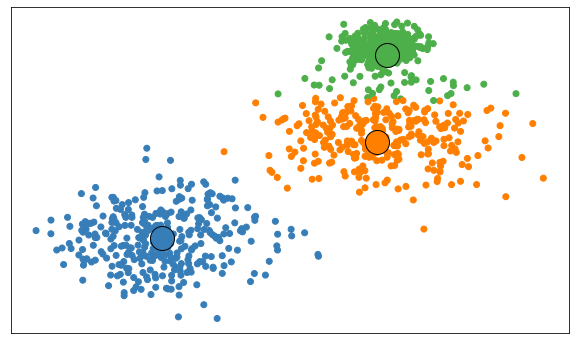

iteration: 9


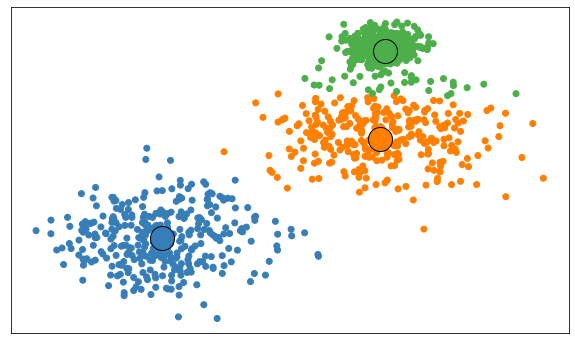

iteration: 10


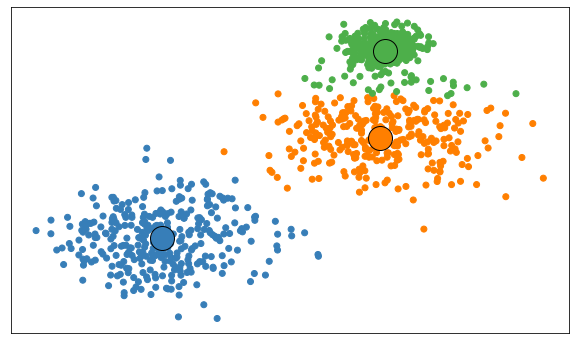

iteration: 11


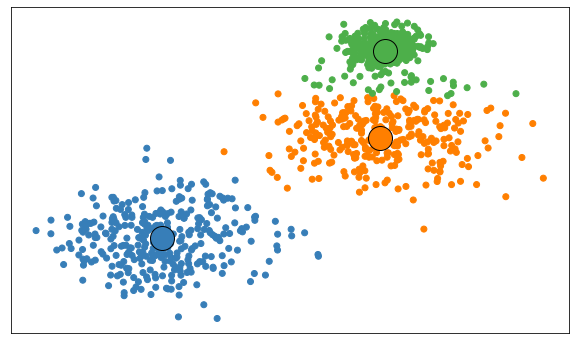

iteration: 12


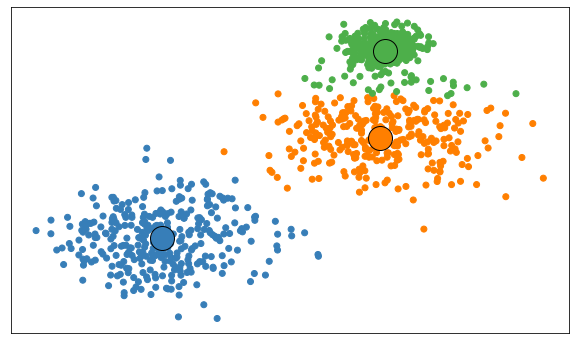

iteration: 13


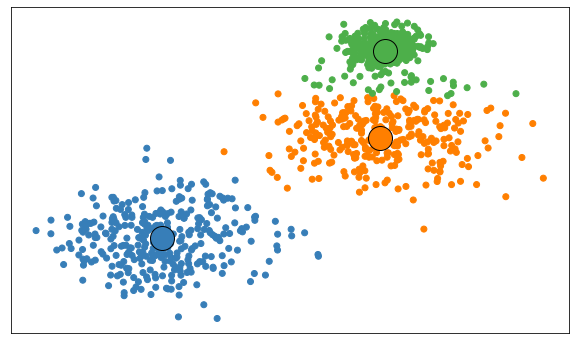

iteration: 14


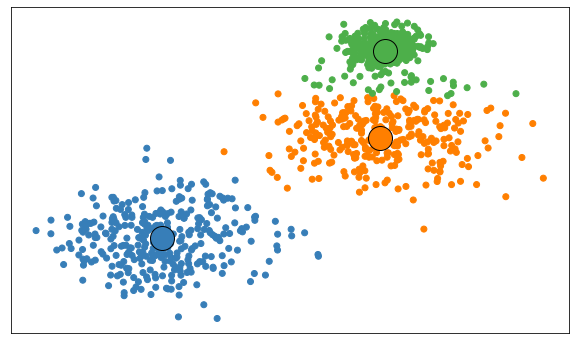

iteration: 15


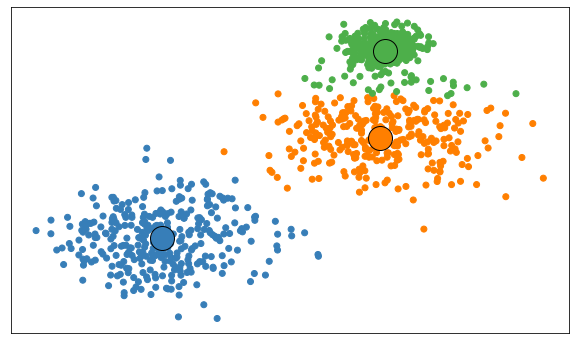

iteration: 16


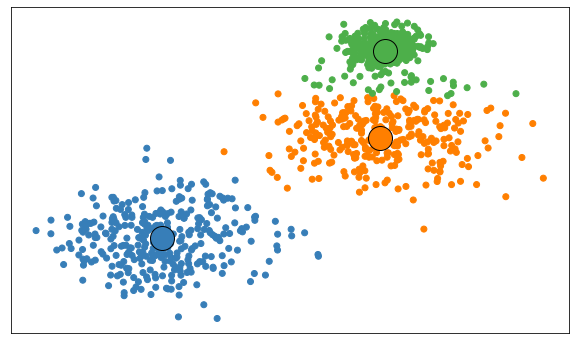

iteration: 17


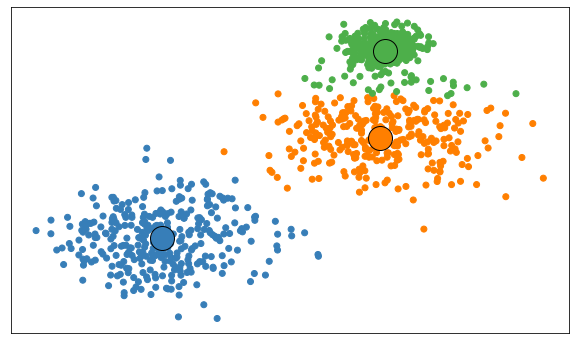

iteration: 18


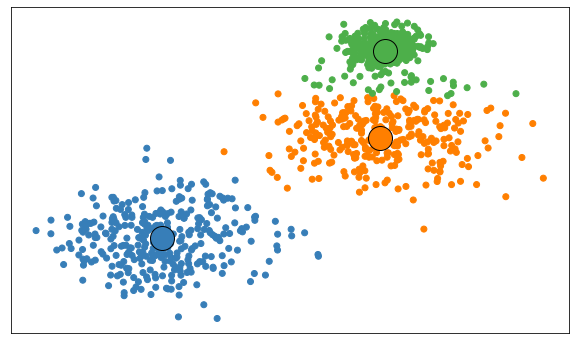

iteration: 19


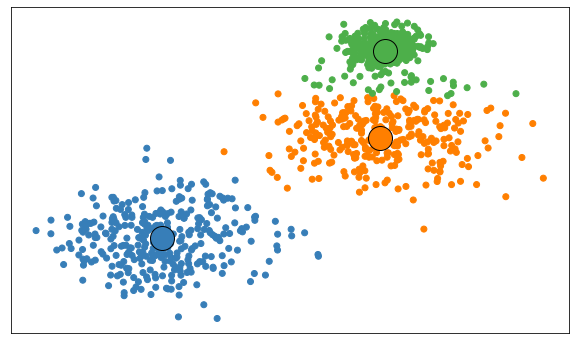

iteration: 20


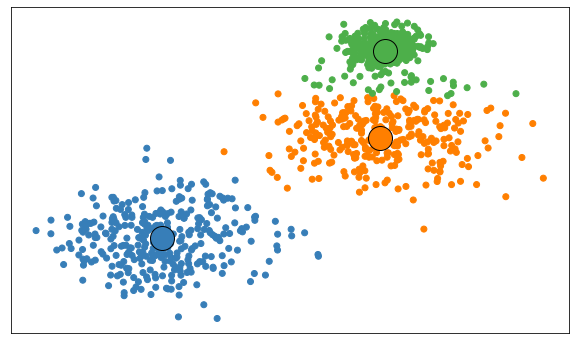

In [165]:
for i in range(1, 21):
    print("iteration: {}".format(i))

    kmeans = cluster.KMeans(
        n_clusters=3, 
        max_iter=i, 
        init=initial_centroids
    )
    X, y = dataset
    kmeans.fit(X)
    y_pred = kmeans.predict(X)

    colors = np.array(list(islice(cycle(color_list), int(max(y_pred) + 1))))

    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred], rasterized=True)
    plt.xticks([])
    plt.yticks([])

    for idx, center in enumerate(kmeans.cluster_centers_):
        plt.plot(
            [center[0]], 
            [center[1]], 
            marker='o', 
            markersize=24, 
            markeredgecolor='black', 
            color=color_list[idx]
        )

    plt.show() 